In [20]:
from datasets.read_datasets import *
import json
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
split='val'

In [22]:
# read data
label_file = DATASET_PATHS["rel"][f"{split}_label_path"]
with open(label_file, "r") as l:
    labels = json.load(l)

In [23]:
len(labels)

10000

In [24]:
label_keys = list(labels.keys()) # name of the images
labels[label_keys[0]]

{'neg': ['cylinder left sphere',
  'cube left cylinder',
  'sphere front cube',
  'sphere right cube',
  'cylinder front sphere',
  'sphere left cylinder',
  'cube front cylinder',
  'cube left sphere',
  'cylinder behind sphere',
  'cylinder behind cube',
  'sphere right cylinder',
  'cylinder left cube',
  'cylinder right sphere',
  'cylinder front cube',
  'cylinder right cube',
  'sphere front cylinder',
  'cube right cylinder',
  'cube behind sphere',
  'sphere behind cylinder',
  'cube behind cylinder'],
 'pos': ['cube front sphere', 'sphere behind cube']}

In [25]:
ims_labels = [
    (im, p) for im in labels for p in labels[im]["pos"]
] # list of tuples (image_name, positive label), one image can have multiple positive labels
len(ims_labels)

20000

In [26]:
# draw a histogram of the number of positive labels per image
data = pd.DataFrame(ims_labels, columns=["image", "pos"])


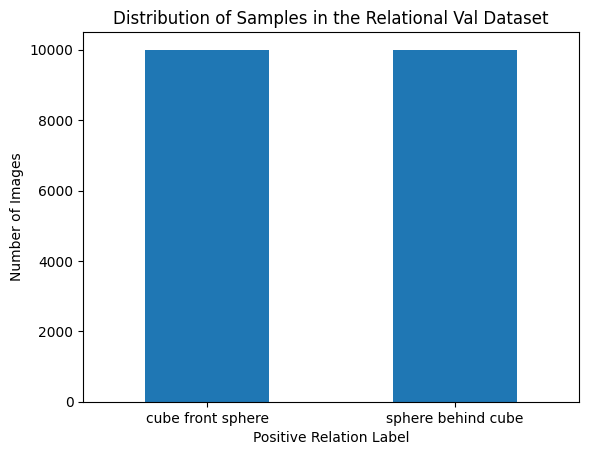

In [27]:
plt.title(f'Distribution of Samples in the Relational {split.capitalize()} Dataset')
plt.ylabel('Number of Images')
plt.xlabel('Positive Relation Label')
data['pos'].value_counts().plot.bar(rot=0).xaxis.set_tick_params(rotation=90 if split == 'train' else 0)